## Demo: low-fidelity deep neural network

- single-fidelity deep nueral network training 

### Import needed packages and functions

In [1]:
from mfbml.problems.illustrative_problems import mf_Forrester_torch
from mfbml.methods.deep_neural_nets import LFDNN
import torch
import matplotlib.pyplot as plt

### define the problem and generate dataset for training and visualization

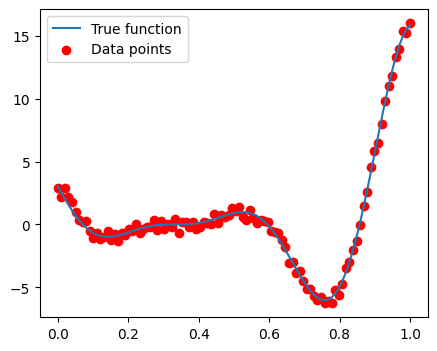

In [53]:
# define the problem 
problem = mf_Forrester_torch(noise_std=0.3)

# sample the data points and the corresponding observations
samples = torch.linspace(0, 1, 100).reshape(-1, 1)
responses = problem.hf(samples)

# test samples 
test_samples = torch.linspace(0, 1, 1000).reshape(-1, 1)
test_responses = problem.hf(test_samples, noise_hf=0.0)

# plot the data points and the true function
figure, ax = plt.subplots(figsize=(5,4))
ax.plot(test_samples, test_responses, label='True function')
ax.scatter(samples, responses, color='red', label='Data points')
ax.legend()
plt.show()



In [54]:
# define the deep neural network
lf_model = LFDNN(in_features=1,
                hidden_features=[20, 20],
                out_features=1, 
                activation='Tanh',
                optimizer='Adam',
                weight_decay=0.001,
                lr=0.001, 
                seed=42,
                loss='mse')

# print the model
print(lf_model)

LFDNN(
  (net): Sequential(
    (0): Linear(in_features=1, out_features=20, bias=True)
    (1): Tanh()
    (2): Linear(in_features=20, out_features=20, bias=True)
    (3): Tanh()
    (4): Linear(in_features=20, out_features=1, bias=True)
  )
  (loss): MSELoss()
)


In [55]:
# train the model 
lf_model.train(X=samples,
               Y=responses,
               batch_size=samples.shape[0],
               data_split=True,
               num_epoch=10000,
               test_portion=0.2,
                 print_iter=100)

epoch:  100 train loss:  21.596975326538086 test loss:  14.718887329101562
epoch:  200 train loss:  19.882888793945312 test loss:  17.319683074951172
epoch:  300 train loss:  17.101106643676758 test loss:  17.185108184814453
epoch:  400 train loss:  12.624859809875488 test loss:  15.236303329467773
epoch:  500 train loss:  8.767698287963867 test loss:  12.452573776245117
epoch:  600 train loss:  6.250467777252197 test loss:  10.27853012084961
epoch:  700 train loss:  4.782430171966553 test loss:  8.786469459533691
epoch:  800 train loss:  3.5269274711608887 test loss:  6.112894535064697
epoch:  900 train loss:  2.2746124267578125 test loss:  4.070948600769043
epoch:  1000 train loss:  1.5599546432495117 test loss:  2.688892126083374
epoch:  1100 train loss:  1.0504591464996338 test loss:  1.8505884408950806
epoch:  1200 train loss:  0.83838951587677 test loss:  1.4767286777496338
epoch:  1300 train loss:  0.7171651124954224 test loss:  1.2790818214416504
epoch:  1400 train loss:  0.636

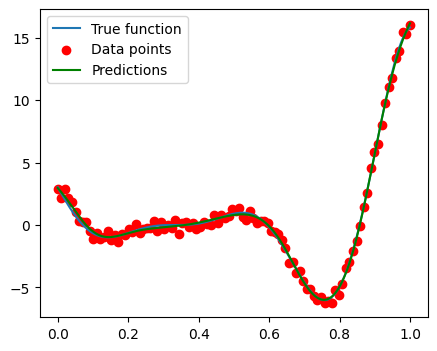

In [56]:
# get the predictions
predictions = lf_model.forward(test_samples)

# plot the data points, the true function and the predictions
figure, ax = plt.subplots(figsize=(5,4))
ax.plot(test_samples, test_responses, label='True function')
ax.scatter(samples, responses, color='red', label='Data points')
ax.plot(test_samples, predictions.detach().numpy(), color='green', label='Predictions')
ax.legend()
plt.show()